In [1]:
################################
### Import des bibliothèques ###
################################

In [2]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem import WordNetLemmatizer
import spacy
from num2words import num2words
from nltk.stem.snowball import FrenchStemmer


In [3]:
#######################################
### Def des étapes de preprocessing ###
#######################################

In [4]:
def convertir_en_minuscule(data):
    data_lowered = []
    for text in data:
        text_lowered = np.char.lower(text)
        data_lowered.append(str(text_lowered))
    return data_lowered

In [5]:
def retirer_mots_vides(data):
    stop_words = stopwords.words('french')
    clean_data = []
    for text in data:
        words = text.split()
        new_text = ""
        for word in words:
            if word not in stop_words:
                new_text = new_text + " " + word
        clean_data.append(new_text)
    return clean_data

In [6]:
def retirer_ponctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,"
    clean_data = []
    for text in data:
        for i in symbols:
            text = text.replace(i, ' ')
        clean_data.append(text)
    return clean_data

In [7]:
def retirer_apostrophe(data):
    clean_data = []
    for text in data:
        text = text.replace("'", "")
        clean_data.append(text)
    return clean_data

In [8]:
def retirer_caractere_unique(data):
    clean_data = []
    for text in data:
        words = text.split()
        new_text = ""
        for word in words:
            if len(word) > 1:
                new_text = new_text + " " + word
        clean_data.append(new_text)
    return clean_data

In [9]:
def racinisation(data):
    stemmer = FrenchStemmer()
    clean_data = []
    for text in data:
        words = text.split()
        new_text = ""
        for word in words:
            new_text = new_text + " " + stemmer.stem(word)
        clean_data.append(new_text)
    return clean_data


In [10]:
def lemmatisation(data):
    nlp = spacy.load('fr_core_news_md')
    clean_data = []
    for text in data:
        doc = nlp(text)
        new_text = ""
        for word in doc:
            new_text = new_text + " " + word.lemma_
        clean_data.append(new_text)
    return clean_data

In [11]:
def nombres_en_lettres(data):
    clean_data = []
    for text in data:
        words = text.split()
        new_text = ""
        for word in words:
            try:
                num = num2words(word, lang='fr')
                new_text = new_text + " " + num
            except:
                new_text = new_text + " " + word
        clean_data.append(new_text)
    return clean_data

In [12]:
def retirer_accents(data):
    e = "éèëê"
    a = "àâ"
    i = "ïî"
    o = "ô"
    u = "ùû"
    clean_data = []
    for text in data:
        for x in e:
            text = text.replace(x, 'e')
        for x in a:
            text = text.replace(x, 'a')
        for x in i:
            text = text.replace(x, 'i')
        for x in o:
            text = text.replace(x, 'o')
        for x in u:
            text = text.replace(x, 'u')
        clean_data.append(text)
    return clean_data

In [13]:
#########################
### def Preprocessing ###
#########################

In [14]:
#On transforme les nombres en lettres avant de retirer les caractères uniques pour éviter de perdre les nombres composé d'un seul
#chiffres
#On retire les accents car le texte est en français

def pretraitement(data):
    data = convertir_en_minuscule(data)
    data = retirer_ponctuation(data)
    data = retirer_apostrophe(data)
    data = retirer_accents(data)
    data = nombres_en_lettres(data)
    data = retirer_caractere_unique(data)
    data = retirer_mots_vides(data)
    data = lemmatisation(data)
    return data

In [15]:
###############################
#### Import Base de données ###
###############################

In [16]:
#la colonne "commentaire" contient les commentaires des consommateurs, la colonne "note" contient les 
#notes accompagnant les commentaires et la colonne "note_eval" les notes attribués aux commentaires
#par un évaluateur

bdd = pd.read_csv("avis_netflix.csv", sep=";")
bdd

,commentaire,note,note_eval
0,Netflix ne considère pas ses clients Le servic...,1,1
1,Toujours pareil les mêmes films séries C'est u...,2,2
2,j'adore tout simplement. juste un peu cher à m...,4,4
3,J'avais le forfait standard avec une image de ...,1,1
4,"Des voleurs Tout simplement, des voleurs. Surv...",1,1
...,...,...,...
97,"On parle de Netflix et ses séries ""originales""...",5,5
98,SUITE ET FIN FLIXBIP et oui le respect des oeu...,1,3
99,certes c est bien on peut regarder des films o...,1,3
100,"Vraiment Netflix au TOP qualité, quantité, tre...",5,5


In [17]:
#Création d'une variable différenciant les commentaires positifs (note de 4 ou 5) des commentaires
#négatifs (note de 1 à 3)

binary = []
for i in bdd['note']:
    if i > 3:
        binary.append(True)
    else:
        binary.append(False)

In [18]:
#Création d'une variable différenciant les commentaires ayant la note de 5 des autres commentaires

binary_pos = []
for i in bdd['note']:
    if i == 5:
        binary_pos.append(True)
    else:
        binary_pos.append(False)

In [19]:
#Création d'une variable différenciant les commentaires ayant la note de 1 des autres commentaires

binary_neg = []
for i in bdd['note']:
    if i == 1:
        binary_neg.append(True)
    else:
        binary_neg.append(False)

In [20]:
################################
### Base de données complète ###
################################

In [21]:
bdd['binary'] = binary
bdd['binary_neg'] = binary_neg
bdd['binary_pos'] = binary_pos
bdd

,commentaire,note,note_eval,binary,binary_neg,binary_pos
0,Netflix ne considère pas ses clients Le servic...,1,1,False,True,False
1,Toujours pareil les mêmes films séries C'est u...,2,2,False,False,False
2,j'adore tout simplement. juste un peu cher à m...,4,4,True,False,False
3,J'avais le forfait standard avec une image de ...,1,1,False,True,False
4,"Des voleurs Tout simplement, des voleurs. Surv...",1,1,False,True,False
...,...,...,...,...,...,...
97,"On parle de Netflix et ses séries ""originales""...",5,5,True,False,True
98,SUITE ET FIN FLIXBIP et oui le respect des oeu...,1,3,False,True,False
99,certes c est bien on peut regarder des films o...,1,3,False,True,False
100,"Vraiment Netflix au TOP qualité, quantité, tre...",5,5,True,False,True


In [22]:
#################################
#### Calcul du Kappa de Cohen ###
#################################


In [23]:
y_true = list(bdd["note"])
y_pred = list(bdd["note_eval"])

In [24]:
#y_true contient les notes des avis et y_pred contient les notes attribuées par l'évaluateur

cohen_kappa_score(y_true, y_pred)

0.6359000509943906

In [25]:
### Accord compris entre 0.61 et 0.8 => accord fort

In [26]:
#####################
### Preprocessing ###
#####################

In [27]:
data = list(bdd['commentaire'].astype(str))

In [28]:
data = pretraitement(data)

C:\Users\diuky\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'fr_core_news_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [29]:
########################
### calcul du TF-IDF ###
########################


In [30]:
DF = {}
for i in range(len(data)):
    tokens = data[i].split()
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
for i in DF:
    DF[i] = len(DF[i])

In [31]:
total_vocab = [x for x in DF]
print(len(total_vocab))

1094


In [32]:
tf_idf = {}
for i in range(len(data)):
    tokens = data[i].split()
    for token in np.unique(tokens):
        tf = tokens.count(token)/len(tokens)
        df = DF[(token)]
        idf = np.log(len(data)/(df))
        tf_idf[i, token] = tf*idf

In [33]:
print(tf_idf)

{(0, 'aucun'): 0.1855897950404917, (0, 'chat'): 0.3276521360603605, (0, 'client'): 0.6697656660572394, (0, 'consideration'): 0.3854144011070225, (0, 'considere'): 0.3854144011070225, (0, 'na'): 0.2698898710136983, (0, 'netflix'): 0.06636095139959801, (0, 'pret'): 0.3854144011070225, (0, 'reabonne'): 0.3854144011070225, (0, 'service'): 0.2232552220190798, (1, 'cest'): 0.1917412949907444, (1, 'film'): 0.12342333169473566, (1, 'meme'): 0.3348828330286197, (1, 'pareil'): 0.4914782040905407, (1, 'pff'): 0.5781216016605338, (1, 'serie'): 0.12342333169473566, (1, 'toujours'): 0.3769418626062713, (1, 'user'): 0.5781216016605338, (2, 'cher'): 0.40474476343660226, (2, 'gout'): 0.561689376103475, (2, 'jadore'): 0.5037657892308802, (2, 'juste'): 0.5037657892308802, (2, 'peu'): 0.3181539343551286, (2, 'simplement'): 0.43079070012145293, (2, 'tout'): 0.17966814047111385, (3, 'ce'): 0.14883681467938653, (3, 'cest'): 0.08521835332921973, (3, 'cher'): 0.15740074133645646, (3, 'conserver'): 0.2569429340

In [34]:
####################################################
### Vectorisation des commentaires consommateurs ###
####################################################

In [35]:
D = np.zeros((len(data), len(total_vocab)))
for i in tf_idf:
    ind = total_vocab.index(i[1])
    D[i[0]][ind] = tf_idf[i]

In [36]:
print(D.shape)
print(D)

(102, 1094)
[[0.06636095 0.3854144  0.66976567 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04684302 0.         0.         ... 0.27205722 0.27205722 0.        ]
 [0.         0.         0.         ... 0.         0.         0.42045207]]


In [37]:
#####################################################
### Classification et visualisation des résultats ###
#####################################################

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier  

In [39]:
X = D
y_1 = bdd['note']
y_2 = bdd['binary']
y_3 = bdd['binary_pos']
y_4 = bdd['binary_neg']

labels = [y_1, y_2, y_3, y_4]
names = ['multiclasse', 'binaire 1', 'binaire 2', 'binaire 3']
values = []

In [40]:
### Résultats moyens des classifiers ###

multiclasse
moyenne / standard deviation
[[0.         0.41025641 0.09763812]
 [1.         0.4017094  0.02634365]
 [2.         0.5        0.01813094]
 [3.         0.4957265  0.03364961]
 [4.         0.51282051 0.05128205]
 [5.         0.40598291 0.05765272]
 [6.         0.42735043 0.10945512]
 [7.         0.47863248 0.06309753]
 [8.         0.51282051 0.1132277 ]
 [9.         0.43589744 0.03626189]]
binaire 1
moyenne / standard deviation
[[0.         0.67521368 0.04482089]
 [1.         0.73931624 0.03021824]
 [2.         0.8034188  0.02834722]
 [3.         0.73931624 0.02417459]
 [4.         0.75213675 0.04482089]
 [5.         0.7991453  0.07856742]
 [6.         0.76068376 0.03963085]
 [7.         0.77350427 0.09323686]
 [8.         0.79487179 0.04796997]
 [9.         0.69230769 0.04796997]]
binaire 2
moyenne / standard deviation
[[0.         0.72649573 0.02834722]
 [1.         0.82905983 0.01911169]
 [2.         0.83760684 0.01598999]
 [3.         0.82478632 0.02634365]
 [4.         0.

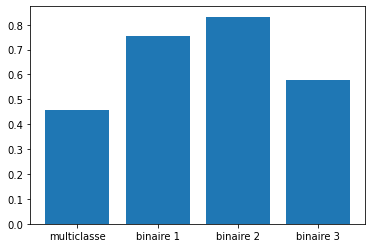

In [41]:
n = -1
for Y in labels:
    n = n + 1
    k_fold = 10
    A = np.zeros((k_fold,3))             
    l = -1

    ensemble_nonlin = np.zeros((9,k_fold)) # 9 classifiers
    models = [MLPClassifier(alpha=1, random_state=123, max_iter=1000, activation = 'logistic'),
          LogisticRegression(solver='lbfgs', random_state=123, multi_class='multinomial'),
          SVC(kernel='rbf', C=1.0),
          SVC(gamma=2, C=1),
          KNeighborsClassifier(n_neighbors=3),
          GaussianNB(),
          RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), fit_intercept =  False),
          DecisionTreeClassifier(random_state=0),
          AdaBoostClassifier()
          ]

    for j in range(k_fold):
        l = l+1
        i=-1
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42+j)
        for clf in models:
            i = i+1
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            ensemble_nonlin[i,j] = f1_score(y_test, y_pred, average='micro')

        A[l,0] = l

        A[l,1] = np.mean(ensemble_nonlin[:,j]) # moyenne F1

        A[l,2] = np.std(ensemble_nonlin[:,j]) # ecart type F1
    print(names[n])    
    print("moyenne / standard deviation")
    print(A)
    F_score_value = []
    for i in range(len(A)):
        F_score_value.append(A[i,1])
        
    values.append(np.mean(F_score_value))
    
for name in range(len(names)):
    print(names[name] + " F_score : " + str(values[name]))

plt.bar(names, values)

plt.show()

In [42]:
### Vote "hard" ###

multiclasse
[[0.         0.46153846]
 [1.         0.42307692]
 [2.         0.5       ]
 [3.         0.5       ]
 [4.         0.53846154]
 [5.         0.38461538]
 [6.         0.46153846]
 [7.         0.5       ]
 [8.         0.57692308]
 [9.         0.46153846]]
binaire 1
[[0.         0.69230769]
 [1.         0.76923077]
 [2.         0.80769231]
 [3.         0.73076923]
 [4.         0.73076923]
 [5.         0.80769231]
 [6.         0.73076923]
 [7.         0.80769231]
 [8.         0.76923077]
 [9.         0.69230769]]
binaire 2
[[0.         0.73076923]
 [1.         0.84615385]
 [2.         0.84615385]
 [3.         0.84615385]
 [4.         0.80769231]
 [5.         0.84615385]
 [6.         0.84615385]
 [7.         0.84615385]
 [8.         0.88461538]
 [9.         0.92307692]]
binaire 3
[[0.         0.65384615]
 [1.         0.65384615]
 [2.         0.57692308]
 [3.         0.57692308]
 [4.         0.46153846]
 [5.         0.65384615]
 [6.         0.57692308]
 [7.         0.57692308]
 [8. 

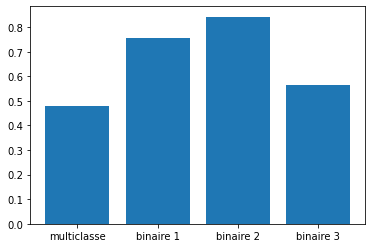

In [43]:
values = []
n = -1
for Y in labels:
    n = n + 1
    k_fold = 10
    A = np.zeros((k_fold,2))             
    l = -1

    estimator = []
    estimator.append(('MLP', MLPClassifier(alpha=1, random_state=123, max_iter=1000, activation = 'logistic'))),
    estimator.append(('LR', LogisticRegression(solver='lbfgs', random_state=123, multi_class='multinomial'))) 
    estimator.append(('SVC1', SVC(kernel='rbf', C=1.0))) 
    estimator.append(('SVC2', SVC(gamma=2, C=1))) 
    estimator.append(('KNC', KNeighborsClassifier(n_neighbors=3))) 
    estimator.append(('GNB', GaussianNB()))  
    estimator.append(('RCCV', RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), fit_intercept =  False))) 
    estimator.append(('DTC', DecisionTreeClassifier(random_state=0))) 
    estimator.append(('ABC', AdaBoostClassifier()))          
    
    
    for j in range(k_fold):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, random_state=42+j)
        vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
        vot_hard.fit(X_train, y_train) 
        y_pred = vot_hard.predict(X_test) 
        A[j,1] = f1_score(y_test, y_pred, average='micro')
        A[j,0] = j
    
    print(names[n])
    print(A)
    F_score_value = []
    for i in range(len(A)):
        F_score_value.append(A[i,1])
        
    values.append(np.mean(F_score_value))
    
for name in range(len(names)):
    print(names[name] + " F_score : " + str(values[name]))

plt.bar(names, values)

plt.show()

In [44]:
### Vote "soft" ###

multiclasse
[[0.         0.46153846]
 [1.         0.42307692]
 [2.         0.5       ]
 [3.         0.46153846]
 [4.         0.5       ]
 [5.         0.46153846]
 [6.         0.46153846]
 [7.         0.46153846]
 [8.         0.61538462]
 [9.         0.5       ]]
binaire 1
[[0.         0.65384615]
 [1.         0.76923077]
 [2.         0.76923077]
 [3.         0.73076923]
 [4.         0.76923077]
 [5.         0.80769231]
 [6.         0.80769231]
 [7.         0.84615385]
 [8.         0.76923077]
 [9.         0.69230769]]
binaire 2
[[0.         0.73076923]
 [1.         0.80769231]
 [2.         0.84615385]
 [3.         0.84615385]
 [4.         0.80769231]
 [5.         0.84615385]
 [6.         0.84615385]
 [7.         0.84615385]
 [8.         0.88461538]
 [9.         0.92307692]]
binaire 3
[[0.         0.65384615]
 [1.         0.65384615]
 [2.         0.65384615]
 [3.         0.69230769]
 [4.         0.76923077]
 [5.         0.65384615]
 [6.         0.53846154]
 [7.         0.57692308]
 [8. 

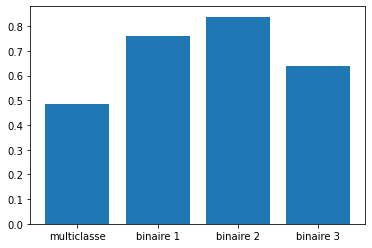

In [45]:
values = []
n = -1
for Y in labels:
    n = n + 1
    k_fold = 10
    A = np.zeros((k_fold,2))             
    l = -1

    estimator = []
    estimator.append(('MLP', MLPClassifier(alpha=1, random_state=123, max_iter=1000, activation = 'logistic'))),
    estimator.append(('LR', LogisticRegression(solver='lbfgs', random_state=123, multi_class='multinomial'))) 
    estimator.append(('KNC', KNeighborsClassifier(n_neighbors=3))) 
    estimator.append(('GNB', GaussianNB()))  
    estimator.append(('DTC', DecisionTreeClassifier(random_state=0))) 
    estimator.append(('ABC', AdaBoostClassifier()))       
    
    
    for j in range(k_fold):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, random_state=42+j)
        vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
        vot_soft.fit(X_train, y_train) 
        y_pred = vot_soft.predict(X_test) 
        A[j,1] = f1_score(y_test, y_pred, average='micro')
        A[j,0] = j
    
    print(names[n])
    print(A)
    F_score_value = []
    for i in range(len(A)):
        F_score_value.append(A[i,1])
        
    values.append(np.mean(F_score_value))
    
for name in range(len(names)):
    print(names[name] + " F_score : " + str(values[name]))

plt.bar(names, values)

plt.show()